# **Experiment Notebook**



## Project Initialisation


### 0. Import Packages

In [ ]:
# Importing necessary libraries required for this project

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import statsmodels.api as sm

In [ ]:
import warnings

# Ignore future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### 1.   Load Dataset

In [ ]:
file_url = 'https://drive.google.com/uc?export=download&id=1Gh4ziqXlThzhRrTswnzE-nlmDkFFHdOg' # Using google drive link as the file url

In [ ]:
df = pd.read_csv(file_url) # convert to dataframe

## Exploratory Data Analysis

### 2. Explore Dataset

In [ ]:
df.head()# Display top 5 rows of the dataset

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,c12e07a0-8a06-4c0d-b5cc-04f3af688570,8ca9f102-02a4-4207-ab63-484e83a1bdf0,42.32,2024-03-24 23:42:43,PayPal,electronics,1,40,East Jameshaven,desktop,110.87.246.85,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,0,282,23
1,7d187603-7961-4fce-9827-9698e2b6a201,4d158416-caae-4b09-bd5b-15235deb9129,301.34,2024-01-22 00:53:31,credit card,electronics,3,35,Kingstad,tablet,14.73.104.153,"5230 Stephanie Forge\nCollinsbury, PR 81853","5230 Stephanie Forge\nCollinsbury, PR 81853",0,223,0
2,f2c14f9d-92df-4aaf-8931-ceaf4e63ed72,ccae47b8-75c7-4f5a-aa9e-957deced2137,340.32,2024-01-22 08:06:03,debit card,toys & games,5,29,North Ryan,desktop,67.58.94.93,"195 Cole Oval\nPort Larry, IA 58422","4772 David Stravenue Apt. 447\nVelasquezside, ...",0,360,8
3,e9949bfa-194d-486b-84da-9565fca9e5ce,b04960c0-aeee-4907-b1cd-4819016adcef,95.77,2024-01-16 20:34:53,credit card,electronics,5,45,Kaylaville,mobile,202.122.126.216,"7609 Cynthia Square\nWest Brenda, NV 23016","7609 Cynthia Square\nWest Brenda, NV 23016",0,325,20
4,7362837c-7538-434e-8731-0df713f5f26d,de9d6351-b3a7-4bc7-9a55-8f013eb66928,77.45,2024-01-16 15:47:23,credit card,clothing,5,42,North Edwardborough,desktop,96.77.232.76,"2494 Robert Ramp Suite 313\nRobinsonport, AS 5...","2494 Robert Ramp Suite 313\nRobinsonport, AS 5...",0,116,15


In [ ]:
df.tail()# Display bottom 5 rows of the dataset

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
23629,d8b7171f-bdd9-479c-b98b-396c621aebfe,98a3d94c-dc9a-4525-b273-e6ffe54cc5a4,53.73,2024-01-26 16:25:05,PayPal,toys & games,5,32,Rebeccafurt,tablet,173.97.197.128,USNV Clayton\nFPO AE 82639,USNV Clayton\nFPO AE 82639,0,363,16
23630,0fd12cf3-c641-4499-8de1-15dc4555cb0c,b3429f52-8b27-46b5-914c-4accd989edb4,47.42,2024-02-25 17:03:26,credit card,clothing,4,41,Nataliefort,desktop,133.222.22.48,"9288 Patricia Cape Apt. 527\nMelissaton, IL 38543","9288 Patricia Cape Apt. 527\nMelissaton, IL 38543",0,296,17
23631,649680d3-a684-44cb-95bf-9b454c3aa86d,066e25c9-4420-4224-bc3f-1a462708090e,1045.23,2024-03-28 23:46:47,bank transfer,health & beauty,1,9,East Shannonville,tablet,206.133.237.168,3015 Elizabeth Summit Suite 819\nEast Joelfort...,3015 Elizabeth Summit Suite 819\nEast Joelfort...,0,329,23
23632,c10dbb08-28fc-4ec1-9850-d4e98d2b9640,cde96e9c-f562-4b8c-8fa8-f356f474232b,34.25,2024-02-09 11:29:18,debit card,home & garden,2,39,Lake Nicole,mobile,16.204.137.130,"531 Brittany Pike\nNew Stacy, OR 87952","531 Brittany Pike\nNew Stacy, OR 87952",0,347,11
23633,23e3c107-f2fc-48c2-abbc-7b809bf6f102,d8d7a64e-8419-4421-910a-a7cf709a900b,85.03,2024-01-23 02:46:52,credit card,clothing,4,38,Holtport,tablet,116.188.254.162,"289 Adams Wells\nWest Joeltown, LA 69190","289 Adams Wells\nWest Joeltown, LA 69190",0,203,2


In [ ]:
df.shape

(23634, 16)

In [ ]:
df.info() # Display information related to the features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23634 entries, 0 to 23633
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction ID      23634 non-null  object 
 1   Customer ID         23634 non-null  object 
 2   Transaction Amount  23634 non-null  float64
 3   Transaction Date    23634 non-null  object 
 4   Payment Method      23634 non-null  object 
 5   Product Category    23634 non-null  object 
 6   Quantity            23634 non-null  int64  
 7   Customer Age        23634 non-null  int64  
 8   Customer Location   23634 non-null  object 
 9   Device Used         23634 non-null  object 
 10  IP Address          23634 non-null  object 
 11  Shipping Address    23634 non-null  object 
 12  Billing Address     23634 non-null  object 
 13  Is Fraudulent       23634 non-null  int64  
 14  Account Age Days    23634 non-null  int64  
 15  Transaction Hour    23634 non-null  int64  
dtypes: f

In [ ]:
print(df.columns.values) #Print columns in the dataset

['Transaction ID' 'Customer ID' 'Transaction Amount' 'Transaction Date'
 'Payment Method' 'Product Category' 'Quantity' 'Customer Age'
 'Customer Location' 'Device Used' 'IP Address' 'Shipping Address'
 'Billing Address' 'Is Fraudulent' 'Account Age Days' 'Transaction Hour']


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction Amount,23634.0,229.367099,282.046669,10.0,69.07,151.415,296.1275,9716.5
Quantity,23634.0,3.000550,1.419663,1.0,2.00,3.000,4.0000,5.0
Customer Age,23634.0,34.560210,10.009471,-2.0,28.00,35.000,41.0000,73.0
Is Fraudulent,23634.0,0.051705,0.221436,0.0,0.00,0.000,0.0000,1.0
Account Age Days,23634.0,178.660531,107.388682,1.0,84.00,178.000,272.0000,365.0
Transaction Hour,23634.0,11.266015,6.980659,0.0,5.00,11.000,17.0000,23.0


In [ ]:
df.describe(include=['O']).T

,count,unique,top,freq
Transaction ID,23634,23634,c12e07a0-8a06-4c0d-b5cc-04f3af688570,1
Customer ID,23634,23634,8ca9f102-02a4-4207-ab63-484e83a1bdf0,1
Transaction Date,23634,23607,2024-02-22 20:18:45,2
Payment Method,23634,4,debit card,5952
Product Category,23634,5,home & garden,4786
Customer Location,23634,14868,North Michael,30
Device Used,23634,3,desktop,7923
IP Address,23634,23634,110.87.246.85,1
Shipping Address,23634,23634,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,1
Billing Address,23634,23634,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,1


### 3. Explore Target variable

In [ ]:
# Set your custom color palette
colors = ["#FF0B04", "#4374B3"]
customPalette = sns.set_palette(sns.color_palette(colors))

sns.set_theme(style="whitegrid")
sns.set_context("notebook", font_scale=1.0)
sns.set(font="Liberation Sans")

def countplot(var, title="Count of Variable"):
    plt.figure(figsize=(8, 6))
    sns.countplot(x=var, data=df, hue=target, palette=customPalette)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.title(title, fontweight="bold", fontsize=14)

    total_counts = df[var].value_counts()

    for i, val in enumerate(total_counts.index):
        counts_per_method = df[df[var] == val]['Is Fraudulent'].value_counts()
        total_per_method = counts_per_method.sum()
        for j, count in enumerate(counts_per_method):
            percentage = (count / total_per_method) * 100
            plt.text(i, count, f'{count} ({percentage:.2f}%)', ha='center', va='bottom', fontsize=10)

    plt.legend(['No', 'Yes'], loc='center right')
    plt.show()

In [ ]:
sns.set_theme(style="whitegrid")
sns.set_context("notebook", font_scale=1.2)
sns.set(font="Liberation Sans")  # Setting the font family

def pie_chart(var):
    plt.figure(figsize=(8, 6))
    # Using the 'Paired' color palette for the pie chart
    colors = sns.color_palette("Paired")
    df[var].value_counts().plot.pie(autopct='%.2f%%', colors=colors)
    plt.title(f'Distribution of {var}', fontweight="bold")
    plt.ylabel(None)
    plt.legend(title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()

In [ ]:
sns.set_theme(style="whitegrid")
sns.set_palette("husl")  # Changing the default palette to 'husl'
sns.set_context("notebook", font_scale=1.2)
sns.set(font="Liberation Sans")  # Setting the font family

def scatter_plot(var):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=var, y=target, hue=target, data=df, palette='husl', legend="full")
    plt.xlabel(var, fontweight="bold")
    plt.ylabel("Target Variable", fontweight="bold")
    plt.title(f'Scatter Plot of {var} against Target Variable', fontweight="bold")
    plt.legend(title="Target", loc="upper right")
    plt.show()

In [ ]:
sns.set_theme(style="whitegrid")
sns.set_palette("husl")  # Changing the default palette to 'husl'
sns.set_context("notebook", font_scale=1.2)
sns.set(font="Liberation Sans")  # Setting the font family

def histplot(var):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[var], bins=50, kde=True, color='blue')
    plt.title(f'Distribution of {var}', fontsize=16, fontweight="bold")
    plt.xlabel(var, fontsize=12, fontweight="bold")
    plt.ylabel('Frequency', fontsize=12, fontweight="bold")
    plt.show()

In [ ]:
target = 'Is Fraudulent'

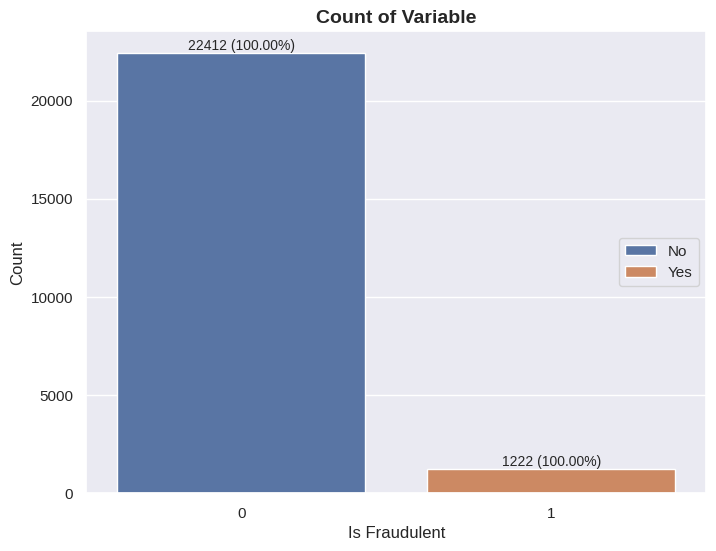

In [ ]:
countplot(target)

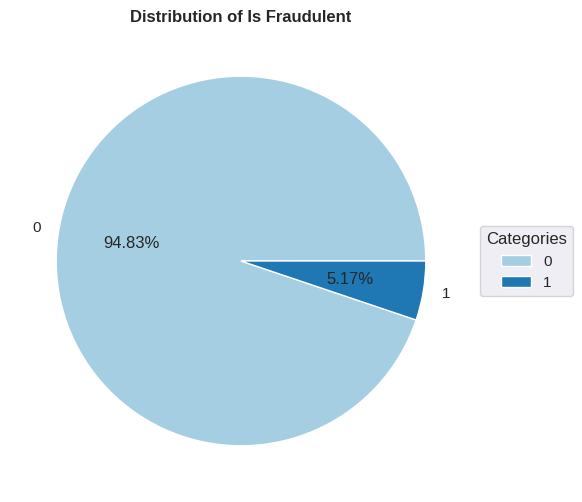

In [ ]:
pie_chart(target)

In [ ]:
df[target].value_counts()

Is Fraudulent
0    22412
1     1222
Name: count, dtype: int64

Above mentioned depictions of the target variable show the following:



*   It is highly imbalanced as 0 (non - fraudulant transations) is
dominating the data by 94.83%
* 0 (non - fraudulant transations) - 22412, 1 (fraudulant transactions) - 1222



### 4. Explore Variables of Interest

In [ ]:
print("Categorical Variables - ")
cat_vars = df.describe(include=[object]).columns.values.tolist() #List of categorical columns
print(cat_vars)

print("\nNumerical Variables - ")
num_vars = df.describe().columns.values.tolist() #List of numerical variables
print(num_vars)

cat_cols = df[cat_vars]
num_cols = df[num_vars]

Categorical Variables - 
['Transaction ID', 'Customer ID', 'Transaction Date', 'Payment Method', 'Product Category', 'Customer Location', 'Device Used', 'IP Address', 'Shipping Address', 'Billing Address']

Numerical Variables - 
['Transaction Amount', 'Quantity', 'Customer Age', 'Is Fraudulent', 'Account Age Days', 'Transaction Hour']


#### [4.1] Important Categorical Variables

##### Payment Method

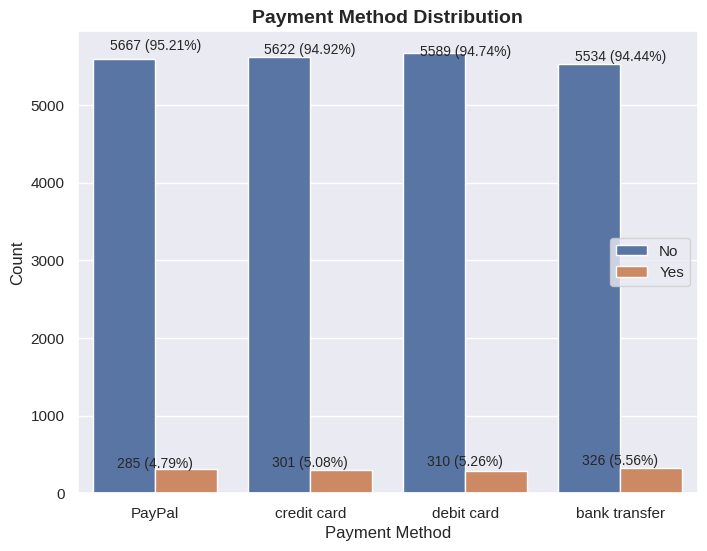

In [ ]:
countplot('Payment Method' , title="Payment Method Distribution") #countplot with target variable

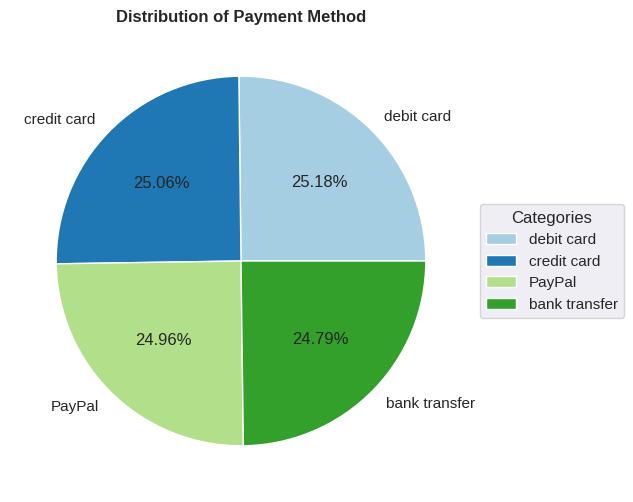

In [ ]:
pie_chart('Payment Method')#distribution of the data

##### Product Category

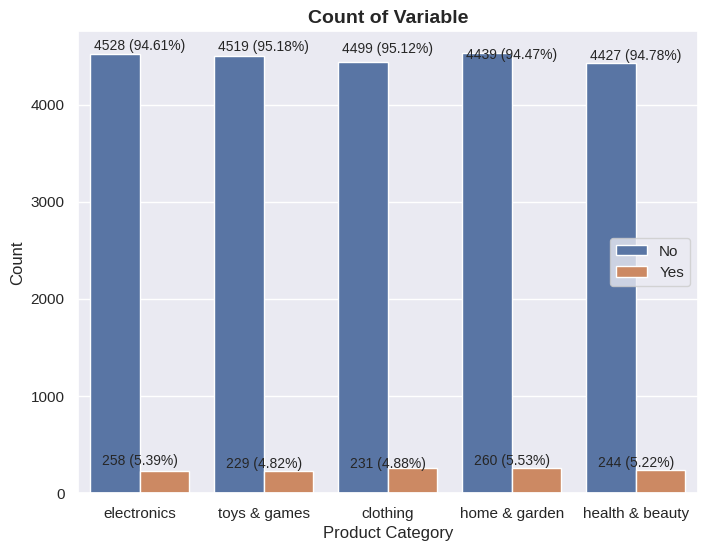

In [ ]:
countplot('Product Category') #countplot with target variable

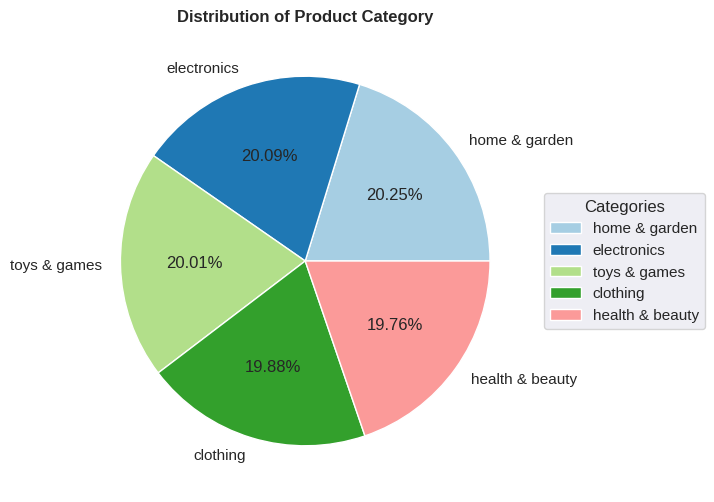

In [ ]:
pie_chart('Product Category')#distribution of the data

##### Device Used

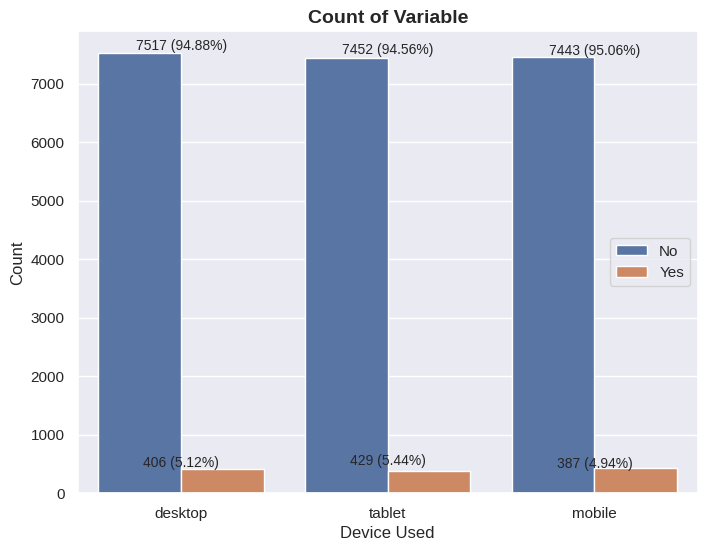

In [ ]:
countplot('Device Used') #countplot with target variable

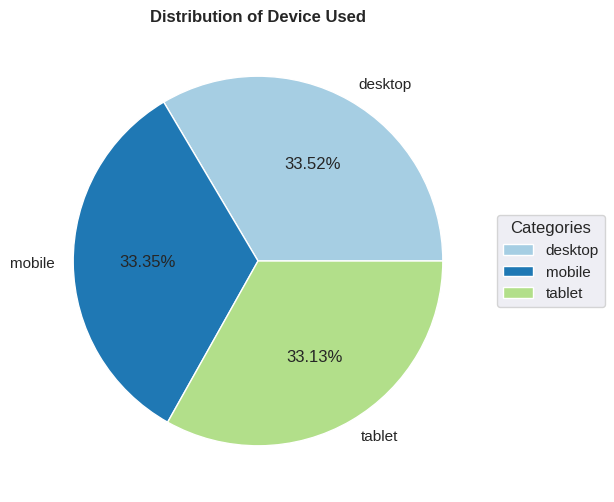

In [ ]:
pie_chart('Device Used')#distribution of the data

#### [4.2] Important Numerical Variables

##### Transaction amount

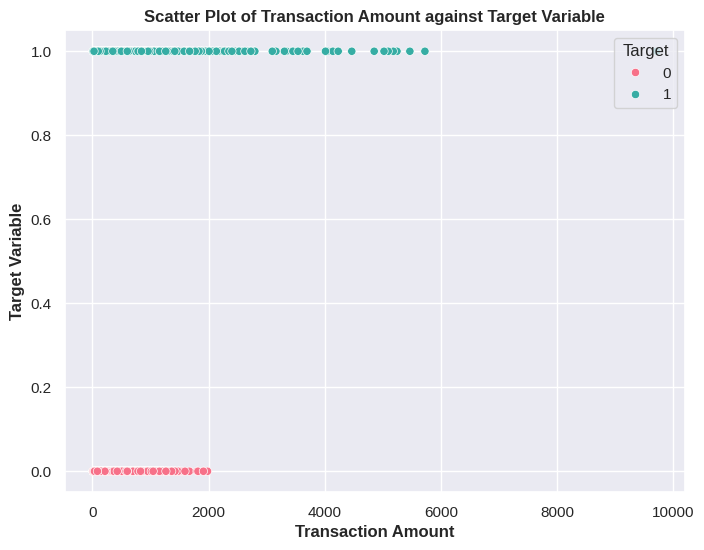

In [ ]:
scatter_plot('Transaction Amount')

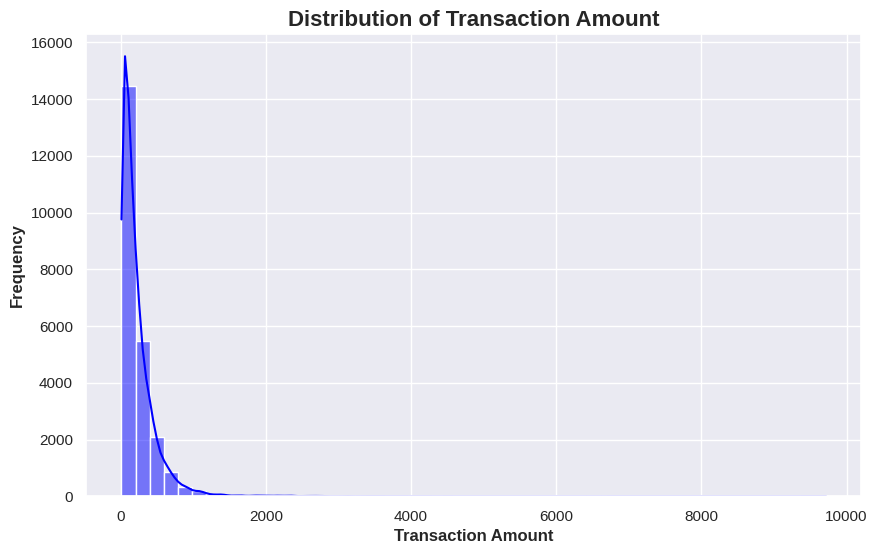

In [ ]:
histplot('Transaction Amount')

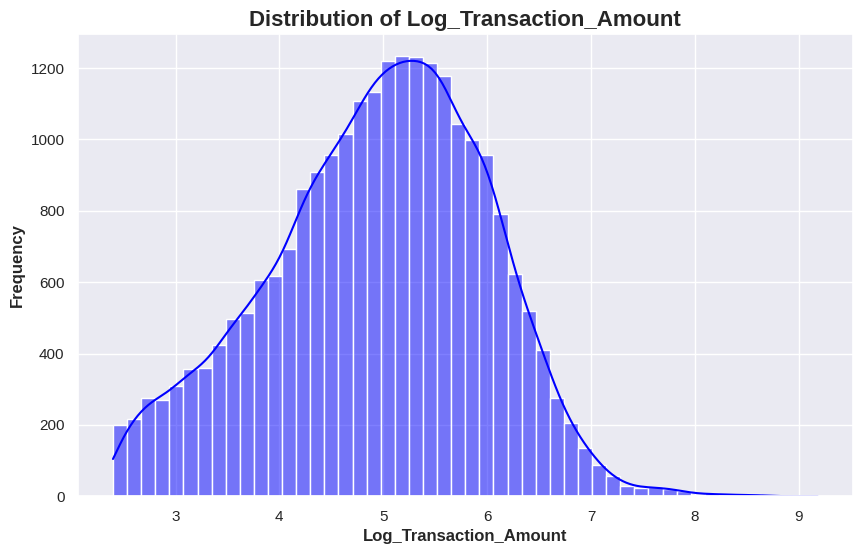

In [ ]:
df['Log_Transaction_Amount'] = np.log1p(df['Transaction Amount'])
histplot('Log_Transaction_Amount')

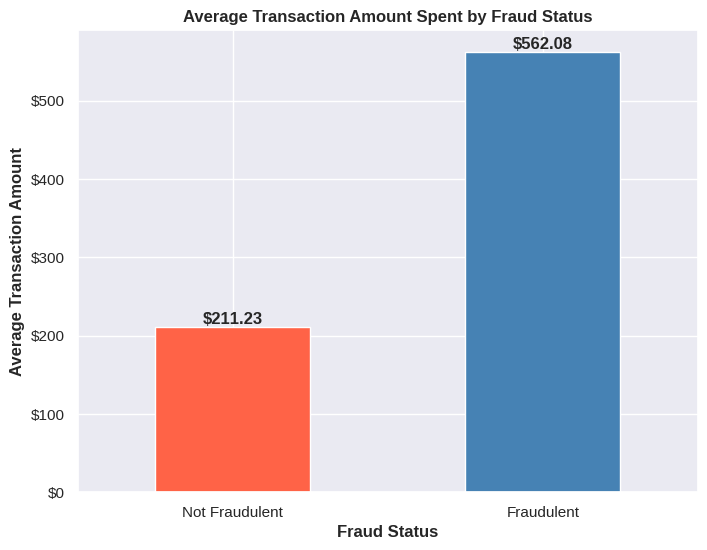

In [ ]:
from matplotlib.ticker import FuncFormatter

sns.set_theme(style="whitegrid")
sns.set_palette("husl")  # Changing the default palette to 'husl'
sns.set_context("notebook", font_scale=1.2)
sns.set(font="Liberation Sans")  # Setting the font family

# Grouping the DataFrame by the 'Is Fraudulent' column to analyze data based on fraud status
fraud_yn = df.groupby('Is Fraudulent')

# Define colors for the bars
colors = ['#FF6347', '#4682B4']

# Calculate the mean transaction amount for each fraud status
f_mean = fraud_yn['Transaction Amount'].mean()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
bar_plot = f_mean.plot(kind='bar', color=colors)
plt.xlabel('Fraud Status', fontweight="bold")
plt.ylabel('Average Transaction Amount', fontweight="bold")
plt.title('Average Transaction Amount Spent by Fraud Status', fontweight="bold")
plt.xticks(ticks=[0, 1], labels=['Not Fraudulent', 'Fraudulent'], rotation=0)

# Formatting y-axis tick labels with dollar signs using FuncFormatter
formatter = FuncFormatter(lambda x, _: f'${int(x)}')
bar_plot.yaxis.set_major_formatter(formatter)

# Adding labels to the bars
for i, mean in enumerate(f_mean):
    plt.text(i, mean, f'${mean:.2f}', ha='center', va='bottom', fontweight="bold")

plt.show()

##### Customer Age

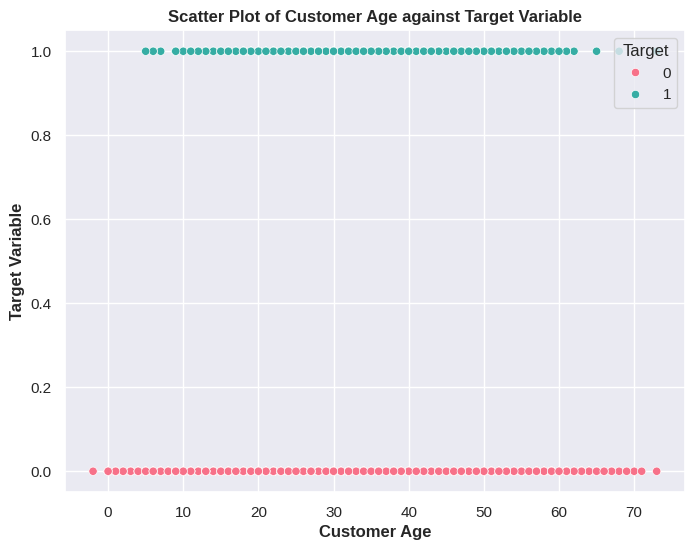

In [ ]:
scatter_plot('Customer Age')

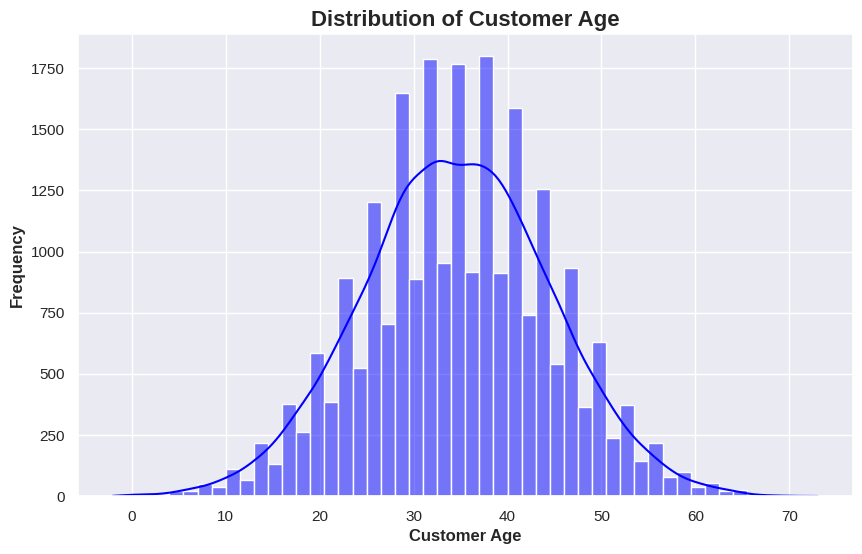

In [ ]:
histplot('Customer Age')

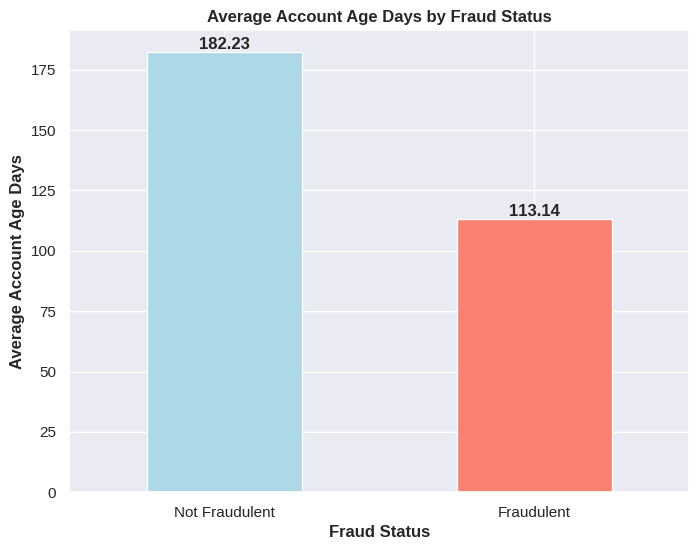

In [ ]:
sns.set_theme(style="whitegrid")
sns.set_context("notebook", font_scale=1.2)
sns.set(font="Liberation Sans")  # Setting the font family

# Grouping the DataFrame by the 'Is Fraudulent' column to analyze data based on fraud status
fraud_yn = df.groupby('Is Fraudulent')

# Define custom colors for the bars
colors = ['lightblue', 'salmon']

# Calculate the mean account age days for each fraud status
f_mean = fraud_yn['Account Age Days'].mean()

# Plotting the bar chart with custom colors
plt.figure(figsize=(8, 6))
bar_plot = f_mean.plot(kind='bar', color=colors)
plt.xlabel('Fraud Status', fontweight="bold")
plt.ylabel('Average Account Age Days', fontweight="bold")
plt.title('Average Account Age Days by Fraud Status', fontweight="bold")
plt.xticks(ticks=[0, 1], labels=['Not Fraudulent', 'Fraudulent'], rotation=0)

# Adding labels to the bars
for i, mean in enumerate(f_mean):
    plt.text(i, mean, f'{mean:.2f}', ha='center', va='bottom', fontweight="bold")

plt.show()

##### Transaction Hour

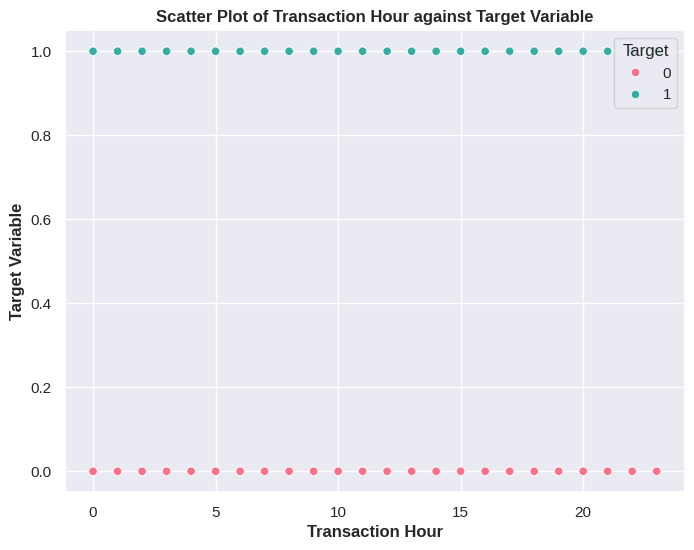

In [ ]:
scatter_plot('Transaction Hour')

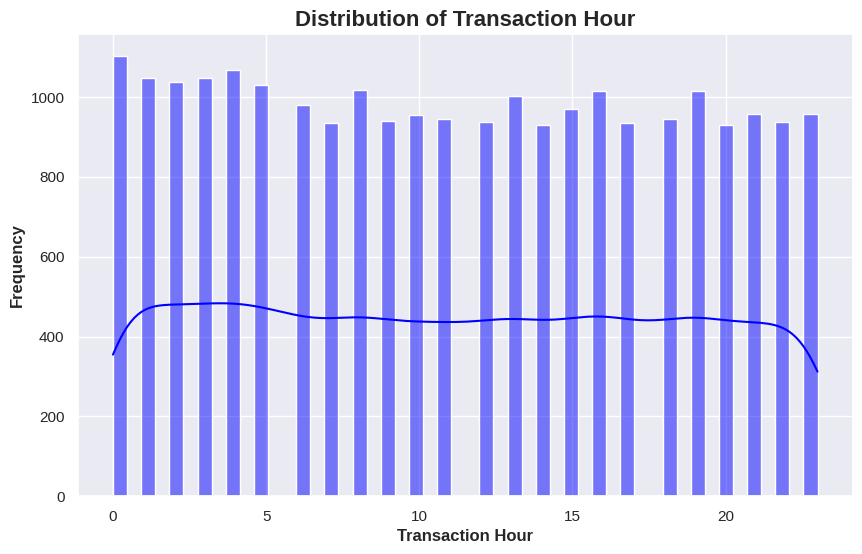

In [ ]:
histplot('Transaction Hour')

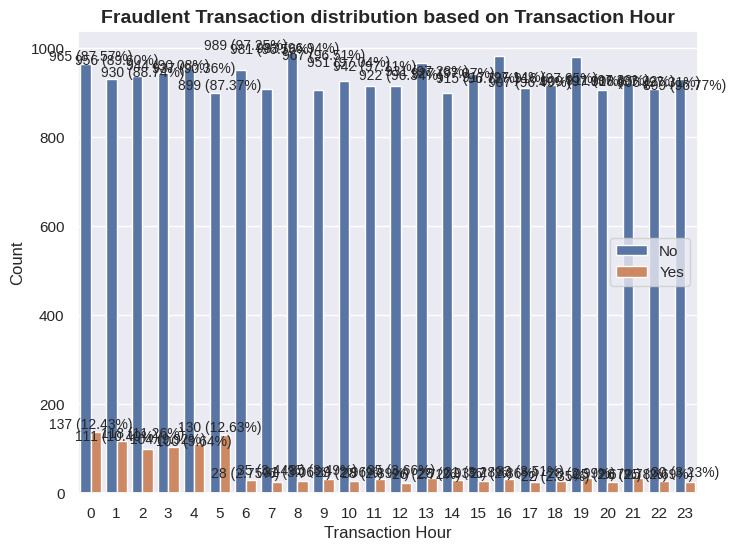

In [ ]:
countplot('Transaction Hour', title="Fraudlent Transaction distribution based on Transaction Hour")

##### Collinearity Matrix

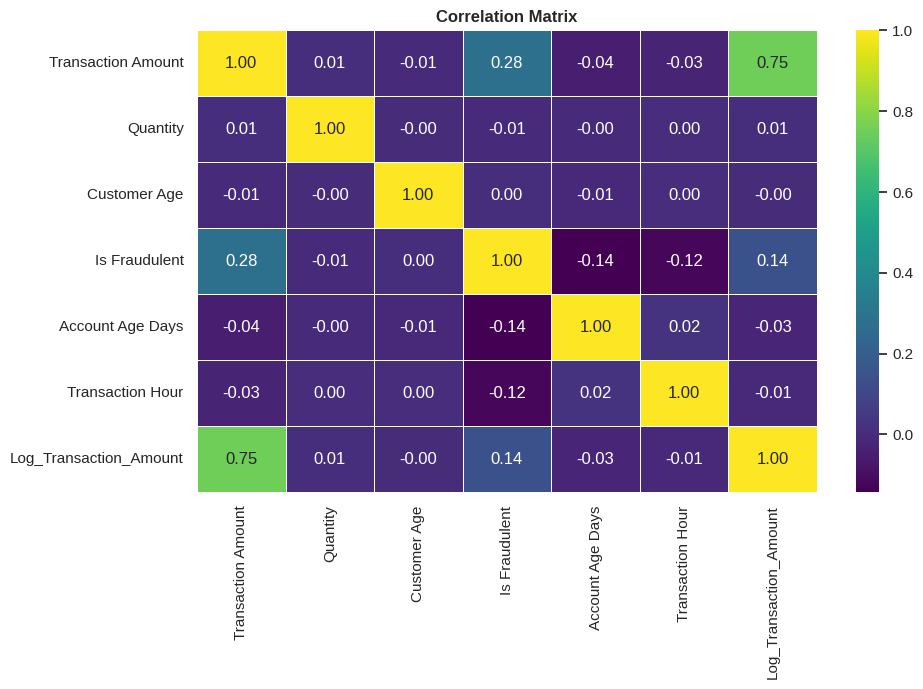

In [ ]:
sns.set_theme(style="whitegrid")
sns.set_context("notebook", font_scale=1.2)
sns.set(font="Liberation Sans")  # Setting the font family

# Selecting only numerical columns from the DataFrame
numeric_df = df.select_dtypes(include=['number'])

# Setting the figure size
plt.figure(figsize=(10, 6))

# Creating the heatmap of the correlation matrix
sns.heatmap(numeric_df.corr(), annot=True, cmap="viridis", fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix', fontweight="bold")
plt.show()

### 5. Prepare Data

In [ ]:
df_cleaned = df.copy()

In [ ]:
df_cleaned.columns.values.tolist()

['Transaction ID',
 'Customer ID',
 'Transaction Amount',
 'Transaction Date',
 'Payment Method',
 'Product Category',
 'Quantity',
 'Customer Age',
 'Customer Location',
 'Device Used',
 'IP Address',
 'Shipping Address',
 'Billing Address',
 'Is Fraudulent',
 'Account Age Days',
 'Transaction Hour',
 'Log_Transaction_Amount']

#### [5.1] Dropping unwanted columns

In [ ]:
df_cleaned.drop(["Transaction ID", "Customer ID", "Customer Location", "Transaction Date", "IP Address", "Shipping Address", "Billing Address", "Log_Transaction_Amount"], axis=1, inplace=True)
df_cleaned.head()

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Device Used,Is Fraudulent,Account Age Days,Transaction Hour
0,42.32,PayPal,electronics,1,40,desktop,0,282,23
1,301.34,credit card,electronics,3,35,tablet,0,223,0
2,340.32,debit card,toys & games,5,29,desktop,0,360,8
3,95.77,credit card,electronics,5,45,mobile,0,325,20
4,77.45,credit card,clothing,5,42,desktop,0,116,15


#### [5.2] Check for outliers

Select the columns for outlier check

In [ ]:
cols_for_outlier = ['Transaction Amount', 'Customer Age', 'Account Age Days']

In [ ]:
df_cleaned.shape

(23634, 9)

In [ ]:
for col in cols_for_outlier:
  Q1 = df_cleaned[col].quantile(0.25)
  Q3 = df_cleaned[col].quantile(0.75)
  IQR = Q3 - Q1

  # Define the bounds
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Remove outliers
  filtered_df = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

df_cleaned = filtered_df

df_cleaned.shape

(23634, 9)

#### [5.3] Missing Values

In [ ]:
missed_val = df_cleaned.isnull().sum() # Sum of missing values
percent_missed_val = 100 * df_cleaned.isnull().sum()/len(df) # % of missing values
missed_val_table = pd.concat([missed_val, percent_missed_val], axis = 1) # Merge the above created tables
missed_val_table = missed_val_table[missed_val_table.iloc[:, 1] != 0].sort_values(1, ascending = False).round(1)
missed_val_table_ren = missed_val_table.rename(columns={0: 'Missing values', 1: '% Missing Values'})
missed_val_table_ren

,Missing values,% Missing Values


#### [5.4] Check for duplicates

In [ ]:
mask = df_cleaned.duplicated().sum() # Sum of duplicate values
print(mask)

0


#### [5.5] Feature Engineering

##### Standard Scalar

In [ ]:
features_to_scale = ['Transaction Amount', 'Customer Age', 'Account Age Days', 'Transaction Hour', 'Quantity']
unscalable_features = ['Payment Method',	'Product Category', 'Device Used']

In [ ]:
scaler = StandardScaler()

In [ ]:
to_be_scaled = df_cleaned[features_to_scale]
scaled = scaler.fit_transform(to_be_scaled)
scaled = pd.DataFrame(scaled,columns=to_be_scaled.columns,index=to_be_scaled.index)
scaled.head()

,Transaction Amount,Customer Age,Account Age Days,Transaction Hour,Quantity
0,-0.663192,0.543476,0.962314,1.680964,-1.409202
1,0.255186,0.043938,0.412896,-1.613924,-0.000387
2,0.393393,-0.555507,1.688663,-0.467876,1.408427
3,-0.473680,1.043013,1.362737,1.251196,1.408427
4,-0.538635,0.743291,-0.583505,0.534916,1.408427


##### One hot encoding

In [ ]:
cat_cols = ['Payment Method',	'Product Category', 'Device Used']
df_encoded = pd.get_dummies(df_cleaned[cat_cols], dtype=np.uint8) # Split categorical feature on the basis of the categories
df_encoded.head()

,Payment Method_PayPal,Payment Method_bank transfer,Payment Method_credit card,Payment Method_debit card,Product Category_clothing,Product Category_electronics,Product Category_health & beauty,Product Category_home & garden,Product Category_toys & games,Device Used_desktop,Device Used_mobile,Device Used_tablet
0,1,0,0,0,0,1,0,0,0,1,0,0
1,0,0,1,0,0,1,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,1,1,0,0
3,0,0,1,0,0,1,0,0,0,0,1,0
4,0,0,1,0,1,0,0,0,0,1,0,0


##### Combining scaled and encoded data

In [ ]:
df_final = pd.concat([scaled, df_encoded],axis=1)
df_final.head()

,Transaction Amount,Customer Age,Account Age Days,Transaction Hour,Quantity,Payment Method_PayPal,Payment Method_bank transfer,Payment Method_credit card,Payment Method_debit card,Product Category_clothing,Product Category_electronics,Product Category_health & beauty,Product Category_home & garden,Product Category_toys & games,Device Used_desktop,Device Used_mobile,Device Used_tablet
0,-0.663192,0.543476,0.962314,1.680964,-1.409202,1,0,0,0,0,1,0,0,0,1,0,0
1,0.255186,0.043938,0.412896,-1.613924,-0.000387,0,0,1,0,0,1,0,0,0,0,0,1
2,0.393393,-0.555507,1.688663,-0.467876,1.408427,0,0,0,1,0,0,0,0,1,1,0,0
3,-0.473680,1.043013,1.362737,1.251196,1.408427,0,0,1,0,0,1,0,0,0,0,1,0
4,-0.538635,0.743291,-0.583505,0.534916,1.408427,0,0,1,0,1,0,0,0,0,1,0,0


In [ ]:
X = df_final
y = df_cleaned['Is Fraudulent']

### 6. Split Dataset

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

In [ ]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [ ]:
print("Train set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Test set size:", len(X_test))

Train set size: 14180
Validation set size: 4727
Test set size: 4727


In [ ]:
print("Target Variable Composition: ", y.value_counts(normalize=True))
print("\nTrain Target Variable Composition: ", y_train.value_counts(normalize=True))
print("\nValidation Target Variable Composition: ", y_val.value_counts(normalize=True))
print("\nTest Target Variable Composition: ", y_test.value_counts(normalize=True))

Target Variable Composition:  Is Fraudulent
0    0.948295
1    0.051705
Name: proportion, dtype: float64

Train Target Variable Composition:  Is Fraudulent
0    0.948307
1    0.051693
Name: proportion, dtype: float64

Validation Target Variable Composition:  Is Fraudulent
0    0.94817
1    0.05183
Name: proportion, dtype: float64

Test Target Variable Composition:  Is Fraudulent
0    0.948382
1    0.051618
Name: proportion, dtype: float64


#### [6.1] Balancing dataset using SMOTE

In [ ]:
smote = SMOTE(sampling_strategy='minority') # Initialise smote object with sampling strategy that deals with minority value
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [ ]:
y_train_sm.value_counts()

Is Fraudulent
0    13447
1    13447
Name: count, dtype: int64

## Modelling

### 7. Baseline Model

In [ ]:
y_central = y.mode()
y_val_central = y_val.mode()
y_test_central = y_test.mode()

In [ ]:
y_base = np.full(y.shape, y_central)
y_val_base = np.full(y_val.shape, y_val_central)
y_test_base = np.full(y_test.shape, y_test_central)

In [ ]:
train_perf = accuracy_score(y, y_base)
valid_perf = accuracy_score(y_val, y_val_base)
test_perf = accuracy_score(y_test, y_test_base)

In [ ]:
print("Training performance: ", train_perf)
print("\nValidation performance: ", valid_perf)
print("\nTesting performance: ", test_perf)

Training performance:  0.9482948294829483

Validation performance:  0.9481700867357732

Testing performance:  0.9483816374021579


### 8. Train Machine Learning Model

### Logistic Regression Model

In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky'],
    'class_weight': [None, 'balanced']
    }

#### Model 1

##### Running on SMOTE training data

In [ ]:
lr_1 = sm.Logit(y_train_sm, X_train_sm)

In [ ]:
results = lr_1.fit()

Optimization terminated successfully.
         Current function value: 0.511680
         Iterations 7


In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Is Fraudulent   No. Observations:                26894
Model:                          Logit   Df Residuals:                    26877
Method:                           MLE   Df Model:                           16
Date:                Wed, 08 May 2024   Pseudo R-squ.:                  0.2618
Time:                        09:05:31   Log-Likelihood:                -13761.
converged:                       True   LL-Null:                       -18642.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Transaction Amount                   0.5509      0.015     36.793      0.000       0.522       0.580
Customer Age                        -0.0472      0.016     -3.026      0.002      -0.078      -0.017
Account Age Days                    -0.7159      0.015    -48.375      0.000      -0.745      -0.687
Transaction Hour                    -0.6512      0.015    -42.284      0.000      -0.681      -0.621
Quantity                             0.0239      0.015      1.574      0.116      -0.006       0.054
Payment Method_PayPal               -0.6635      0.047    -14.255      0.000      -0.755      -0.572
Payment Method_bank transfer        -0.4770      0.046    -10.465      0.000      -0.566      -0.388
Payment Method_credit card          -0.6521      0.047    -13.895      0.000      -0.744      -0.560
Payment Method_debit card           -0.5301      0.046    -11.480      0.000      -0.621      -0.440
Product Category_clothing           -0.8390      0.047    -17.836      0.000      -0.931      -0.747
Product Category_electronics        -1.1308      0.048    -23.381      0.000      -1.226      -1.036
Product Category_health & beauty    -0.9796      0.049    -20.195      0.000      -1.075      -0.885
Product Category_home & garden      -1.1339      0.049    -23.024      0.000      -1.230      -1.037
Product Category_toys & games       -1.2665      0.050    -25.410      0.000      -1.364      -1.169
Device Used_desktop                  0.6710      0.045     14.828      0.000       0.582       0.760
Device Used_mobile                   0.7786      0.045     17.271      0.000       0.690       0.867
Device Used_tablet                   0.5595      0.046     12.217      0.000       0.470       0.649
====================================================================================================
"""

In [ ]:
log_reg_1 = LogisticRegression()

In [ ]:
log_reg_1.fit(X_train_sm, y_train_sm)

LogisticRegression()

In [ ]:
y_train_preds = log_reg_1.predict(X_train)

In [ ]:
y_val_preds = log_reg_1.predict(X_val)

In [ ]:
acc_1_train = accuracy_score(y_train, y_train_preds)
print(acc_1_train)

0.9191114245416079


In [ ]:
acc_1_val = accuracy_score(y_val, y_val_preds)
print(acc_1_val)

0.9193991961074678


#### Model 2 with GridSearchCV

In [ ]:
grid_search_lg = GridSearchCV(estimator=log_reg_1, param_grid=param_grid, cv=5)

In [ ]:
grid_search_lg.fit(X_train_sm, y_train_sm)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky']})

In [ ]:
print("Best hyperparameters:", grid_search_lg.best_params_)

Best hyperparameters: {'C': 100, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
y_train_preds = grid_search_lg.predict(X_train)

In [ ]:
y_val_preds = grid_search_lg.predict(X_val)

In [ ]:
acc_2_train = accuracy_score(y_train, y_train_preds)
print(acc_2_train)

0.918688293370945


In [ ]:
acc_2_val = accuracy_score(y_val, y_val_preds)
print(acc_2_val)

0.9191876454410831


#### Assess Best Logisitic Model Performance

In [ ]:
y_test_preds_1 = grid_search_lg.predict(X_test)

In [ ]:
print(classification_report(y_test, y_test_preds_1))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      4483
           1       0.30      0.39      0.34       244

    accuracy                           0.92      4727
   macro avg       0.64      0.67      0.65      4727
weighted avg       0.93      0.92      0.93      4727



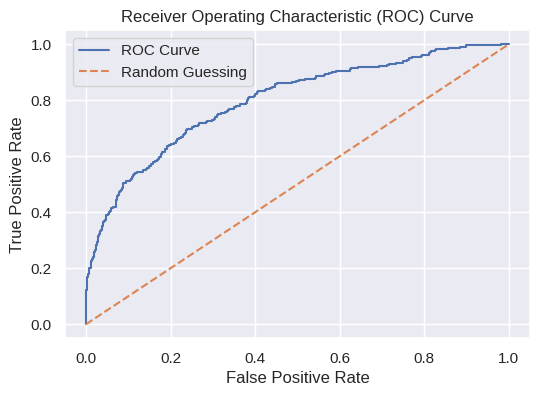

AUC Score: 0.7972989033251299


In [ ]:
# Predict probabilities on the test set
y_prob = grid_search_lg.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_prob)
print("AUC Score:", auc_score)

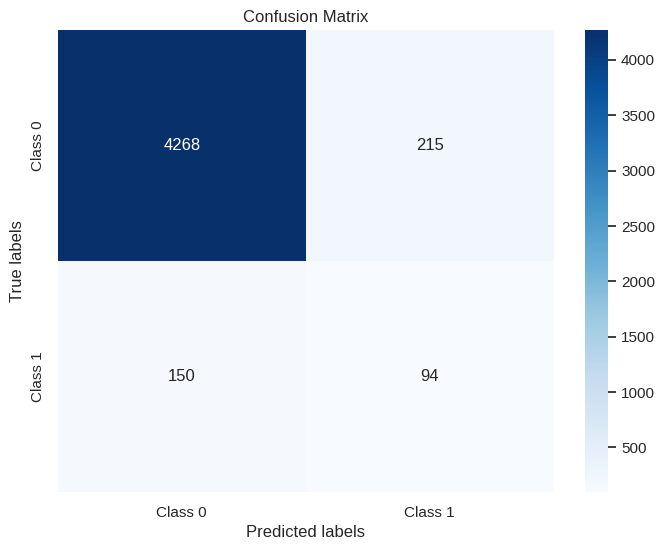

In [ ]:
cm = confusion_matrix(y_test, y_test_preds_1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Random Forest Classifier

#### Model 1

In [ ]:
# Define the Random Forest Classifier
rf = RandomForestClassifier(random_state=8)

In [ ]:
hyperparams_grid = {
    'n_estimators': np.arange(10, 100, 20),
    'max_depth': np.arange(5, 30, 5),
    'min_samples_split': np.arange(5, 15, 5),
    'min_samples_leaf': np.arange(2, 20, 4)
    }
hyperparams_grid

{'n_estimators': array([10, 30, 50, 70, 90]),
 'max_depth': array([ 5, 10, 15, 20, 25]),
 'min_samples_split': array([ 5, 10]),
 'min_samples_leaf': array([ 2,  6, 10, 14, 18])}

In [ ]:
# Train the Random Forest Classifier on the training data
grid_search_rf = GridSearchCV(rf, hyperparams_grid, cv=3, verbose=1)

In [ ]:
grid_search_rf.fit(X_train_sm, y_train_sm)

Fitting 3 folds for each of 250 candidates, totalling 750 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=8),
             param_grid={'max_depth': array([ 5, 10, 15, 20, 25]),
                         'min_samples_leaf': array([ 2,  6, 10, 14, 18]),
                         'min_samples_split': array([ 5, 10]),
                         'n_estimators': array([10, 30, 50, 70, 90])},
             verbose=1)

In [ ]:
grid_search_rf.best_params_

{'max_depth': 25,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 90}

In [ ]:
y_train_pred = grid_search_rf.predict(X_train)

In [ ]:
y_val_pred = grid_search_rf.predict(X_val)

In [ ]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13447
           1       0.95      0.91      0.93       733

    accuracy                           0.99     14180
   macro avg       0.97      0.95      0.96     14180
weighted avg       0.99      0.99      0.99     14180



In [ ]:
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4482
           1       0.34      0.36      0.35       245

    accuracy                           0.93      4727
   macro avg       0.65      0.66      0.66      4727
weighted avg       0.93      0.93      0.93      4727



In [ ]:
y_test_preds_2 = grid_search_rf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_test_preds_2))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4483
           1       0.34      0.34      0.34       244

    accuracy                           0.93      4727
   macro avg       0.65      0.65      0.65      4727
weighted avg       0.93      0.93      0.93      4727



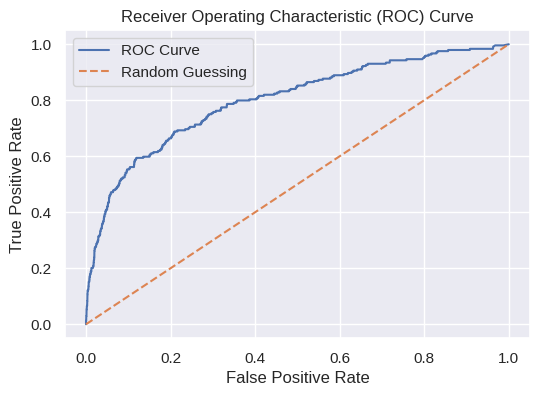

AUC Score: 0.7996785671187693


In [ ]:
# Predict probabilities on the test set
y_prob = grid_search_rf.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_prob)
print("AUC Score:", auc_score)

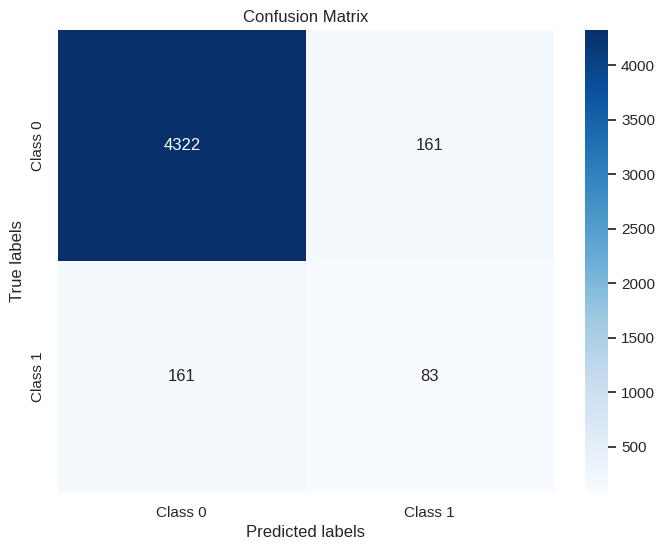

In [ ]:
cm = confusion_matrix(y_test, y_test_preds_2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()